# Exploratory Data Analysis 

This area needs a lot of love. I spent so much time learning how to convert the data to get it in a useable form that my time was limited for EDA. I was also working from a curated balanced dataset created by the SwissADME team, so I after a few quick looks around, it was clear that it was a clean dataset. I would still like to spend more time exploring the data more, especially as we add more features. 

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier

%matplotlib inline
%config InlineBackend.figure_format='retina'

import warnings
warnings.filterwarnings('ignore')

# Import Data

In [2]:
cyto_assay = pd.read_csv('../data/train_data/cyto_assay_clean.csv')
cyp2c19 = pd.read_pickle(".././data/cyp_datasets/cyp2c19.pkl")
cyp2c19_128 = pd.read_pickle(".././data/cyp_datasets/cyp2c19_128.pkl")
cyp2c19_512 = pd.read_pickle(".././data/cyp_datasets/cyp2c19_128.pkl")
cyp2c9 = pd.read_pickle(".././data/cyp_datasets/cyp2c9.pkl")
cyp1a2 = pd.read_pickle(".././data/cyp_datasets/cyp1a2.pkl")
cyp2d6 = pd.read_pickle(".././data/cyp_datasets/cyp2d6.pkl")
cyp3a4 = pd.read_pickle(".././data/cyp_datasets/cyp3a4.pkl")


In [3]:
cyto_assay.head()

,Unnamed: 0,index,PUBCHEM_RESULT_TAG,PUBCHEM_SID,PUBCHEM_CID,PUBCHEM_ACTIVITY_OUTCOME,PUBCHEM_ACTIVITY_SCORE,PUBCHEM_ACTIVITY_URL,PUBCHEM_ASSAYDATA_COMMENT,Inhibition Observed,...,Activity at 11.43 uM,Activity at 25.56 uM,Activity at 57.14 uM,Activity at 0.00164 uM,Activity at 0.00366 uM,Activity at 0.00818 uM,Compound QC,Panel ID,Panel Name,Panel Target
0,0,0,1,842238,6602638.0,0,NaN,NaN,NaN,1,...,8.1486,NaN,-15.6281,NaN,NaN,NaN,QC'd by DPISMR,1,0,NP_000760.1
1,1,1,2,842238,6602638.0,2,NaN,NaN,NaN,1,...,-8.5062,NaN,-37.6308,NaN,NaN,NaN,QC'd by DPISMR,2,2,NP_001020332.1
2,2,2,3,842238,6602638.0,0,NaN,NaN,NaN,1,...,0.4027,NaN,-2.2935,NaN,-1.3363,NaN,QC'd by DPISMR,3,4,NP_059488.2
3,3,3,4,842238,6602638.0,0,NaN,NaN,NaN,1,...,-7.3920,NaN,-11.9048,NaN,NaN,NaN,QC'd by DPISMR,4,3,NP_000752.2
4,4,4,5,842238,6602638.0,2,NaN,NaN,NaN,1,...,-41.7035,NaN,-10.7694,NaN,NaN,NaN,QC'd by DPISMR,5,1,NP_000762.2


In [4]:
cyto_assay.isnull().sum()

Unnamed: 0                       0
index                            0
PUBCHEM_RESULT_TAG               0
PUBCHEM_SID                      0
PUBCHEM_CID                    110
PUBCHEM_ACTIVITY_OUTCOME         0
PUBCHEM_ACTIVITY_SCORE       85715
PUBCHEM_ACTIVITY_URL         85715
PUBCHEM_ASSAYDATA_COMMENT    85715
Inhibition Observed              0
Approved Drug                    0
Collection                   80145
Analysis Comment             85715
Activity Score                   0
Potency                      45031
Curve_Description            42460
Fit_LogAC50                  42606
Fit_HillSlope                42606
Fit_R2                       42606
Fit_InfiniteActivity         42606
Fit_ZeroActivity             42606
Fit_CurveClass                   0
Excluded_Points              42606
Max_Response                     0
Activity at 0.0007 uM        58389
Activity at 0.00160 uM       73752
Activity at 0.00368 uM       20779
Activity at 0.00820 uM       73638
Activity at 0.018 uM

In [5]:
cyto_assay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85715 entries, 0 to 85714
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Unnamed: 0                 85715 non-null  int64  
 1   index                      85715 non-null  int64  
 2   PUBCHEM_RESULT_TAG         85715 non-null  int64  
 3   PUBCHEM_SID                85715 non-null  int64  
 4   PUBCHEM_CID                85605 non-null  float64
 5   PUBCHEM_ACTIVITY_OUTCOME   85715 non-null  int64  
 6   PUBCHEM_ACTIVITY_SCORE     0 non-null      float64
 7   PUBCHEM_ACTIVITY_URL       0 non-null      float64
 8   PUBCHEM_ASSAYDATA_COMMENT  0 non-null      float64
 9   Inhibition Observed        85715 non-null  int64  
 10  Approved Drug              85715 non-null  object 
 11  Collection                 5570 non-null   object 
 12  Analysis Comment           0 non-null      float64
 13  Activity Score             85715 non-null  int

In [6]:
cyto_assay['Inhibition Observed'].unique()

array([1, 0])

In [7]:
type(cyto_assay['Inhibition Observed'].items)

method

In [8]:
cyto_assay['Inhibition Observed'] = cyto_assay['Inhibition Observed'].map({True:1, False:0}).astype(int)

In [9]:
# pd.to_numeric(cyto_assay['Inhibition Observed'], errors='coerce')

In [10]:
cyto_assay['Inhibition Observed'].unique()

array([1, 0])

In [11]:
cyto_assay_corr = (cyto_assay.corr()[['Inhibition Observed']].sort_values(by='Inhibition Observed', ascending=False))
cyto_assay_corr

,Inhibition Observed
Inhibition Observed,1.000000e+00
PUBCHEM_ACTIVITY_OUTCOME,3.474567e-01
Activity Score,2.915571e-01
Activity at 0.00366 uM,7.033316e-02
Activity at 0.00164 uM,6.621039e-02
PUBCHEM_SID,5.134221e-02
Unnamed: 0,3.583945e-02
PUBCHEM_RESULT_TAG,3.583945e-02
index,3.583945e-02
Activity at 0.00368 uM,3.316173e-02


In [12]:
cyto_assay.isnull().sum()

Unnamed: 0                       0
index                            0
PUBCHEM_RESULT_TAG               0
PUBCHEM_SID                      0
PUBCHEM_CID                    110
PUBCHEM_ACTIVITY_OUTCOME         0
PUBCHEM_ACTIVITY_SCORE       85715
PUBCHEM_ACTIVITY_URL         85715
PUBCHEM_ASSAYDATA_COMMENT    85715
Inhibition Observed              0
Approved Drug                    0
Collection                   80145
Analysis Comment             85715
Activity Score                   0
Potency                      45031
Curve_Description            42460
Fit_LogAC50                  42606
Fit_HillSlope                42606
Fit_R2                       42606
Fit_InfiniteActivity         42606
Fit_ZeroActivity             42606
Fit_CurveClass                   0
Excluded_Points              42606
Max_Response                     0
Activity at 0.0007 uM        58389
Activity at 0.00160 uM       73752
Activity at 0.00368 uM       20779
Activity at 0.00820 uM       73638
Activity at 0.018 uM

In [13]:
features = cyto_assay.select_dtypes(include=['float64','int64'])

X = features
y = 'Inhibition Observed'

In [14]:
cyto_assay['Approved Drug'].unique()

array(['Biodiverse', 'Exploratory'], dtype=object)

In [15]:
cyto_assay['Approved Drug'] = cyto_assay['Approved Drug'].replace({'Biodiverse':'1', 'Exploratory':'0'}).astype(float)

In [16]:
cyto_assay['Compound QC'].unique()

array(["QC'd by DPISMR", "QC'd by Pharmacopeia", "QC'd by NCI",
       "QC'd by Prestwick", "QC'd by SigmaAldrich", "QC'd by Tocris",
       "QC'd by UPCMLD", "QC'd by ChemBridge", "QC'd by BUCMLD"],
      dtype=object)

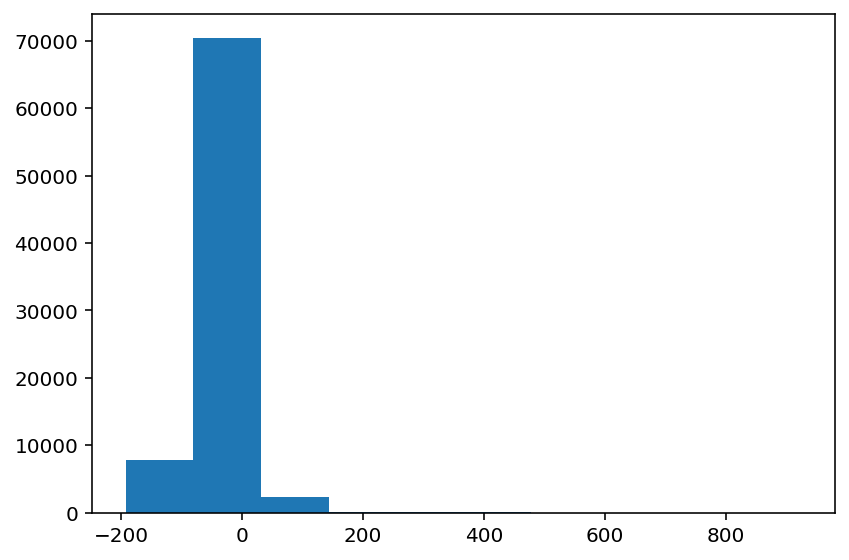

In [17]:
plt.hist(cyto_assay['Activity at 11.43 uM'])
plt.tight_layout();

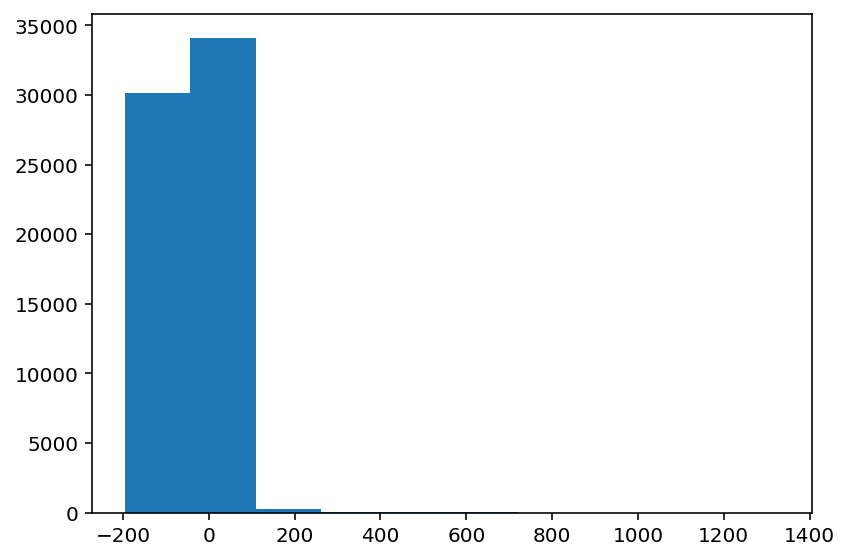

In [18]:
plt.hist(cyto_assay['Activity at 57.14 uM'])
plt.tight_layout();

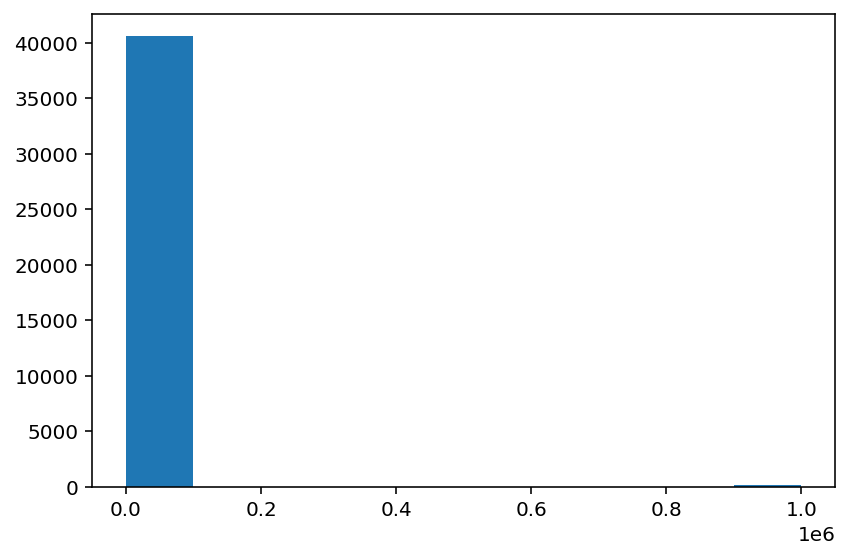

In [19]:
plt.hist(cyto_assay['Potency'])
plt.tight_layout();

In [20]:
X = cyp2c19.drop(columns=['PUBCHEM_ACTIVITY_OUTCOME', 'Inhibition Observed'], axis=1)
y = cyp2c19['Inhibition Observed']

In [21]:
X.head()

,index,0,1,2,3,4,5,6,7,8,...,54,55,56,57,58,59,60,61,62,63
0,5,1,1,1,0,1,1,0,0,1,...,1,1,0,0,0,0,0,1,0,0
1,10,1,0,0,0,1,1,0,0,0,...,0,0,0,1,1,1,0,0,1,0
2,15,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,0,0,1,0,0
3,20,0,0,0,0,0,1,0,1,1,...,1,0,1,1,1,0,0,1,0,1
4,25,1,1,1,1,1,0,0,0,1,...,0,1,1,0,1,1,0,1,0,1


## Feature Importance

Automatically created module for IPython interactive environment
1. feature 0 (0.029288)
2. feature 54 (0.018357)
3. feature 28 (0.018053)
4. feature 26 (0.017984)
5. feature 13 (0.017855)
6. feature 43 (0.017687)
7. feature 5 (0.017638)
8. feature 25 (0.017630)
9. feature 15 (0.017562)
10. feature 9 (0.017558)
11. feature 64 (0.017467)
12. feature 45 (0.017367)
13. feature 12 (0.017347)
14. feature 4 (0.017273)
15. feature 47 (0.017253)
16. feature 2 (0.017226)
17. feature 32 (0.017201)
18. feature 33 (0.017155)
19. feature 36 (0.017087)
20. feature 7 (0.017021)
21. feature 57 (0.017009)
22. feature 38 (0.016948)
23. feature 20 (0.016937)
24. feature 21 (0.016901)
25. feature 50 (0.016871)
26. feature 41 (0.016861)
27. feature 16 (0.016836)
28. feature 6 (0.016697)
29. feature 46 (0.016680)
30. feature 8 (0.016667)
31. feature 14 (0.016619)
32. feature 42 (0.016540)
33. feature 27 (0.016533)
34. feature 22 (0.016450)
35. feature 55 (0.016422)
36. feature 44 (0.016199)
37. feature 63 (

<Figure size 432x288 with 0 Axes>

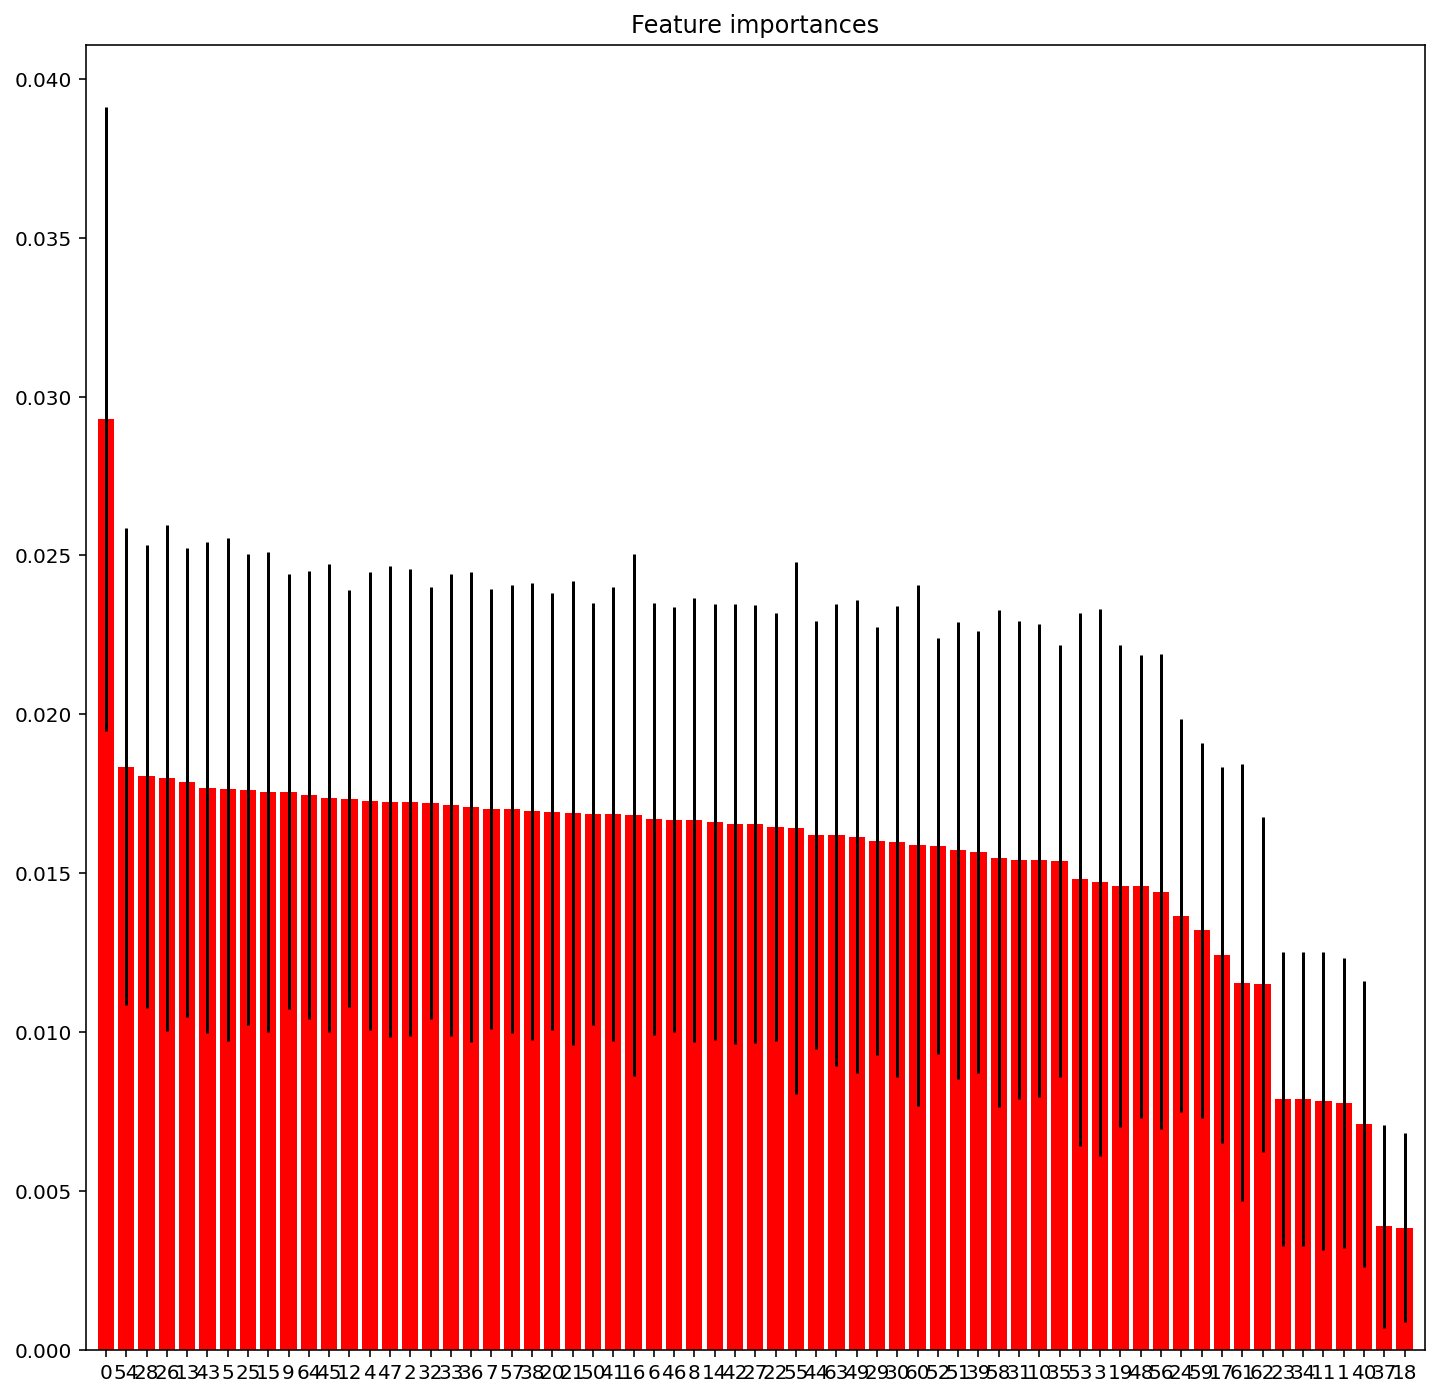

In [22]:
print(__doc__)

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
# print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.figure(figsize = (12,12))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

## 128 Bit cyp2c19_df

In [23]:
X = cyp2c19_128.drop(columns=['PUBCHEM_ACTIVITY_OUTCOME', 'Inhibition Observed'], axis=1)
y = cyp2c19_128['Inhibition Observed']

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
# print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.figure(figsize = (12,12))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Automatically created module for IPython interactive environment


## 512 bit

In [ ]:
X = cyp2c19_128.drop(columns=['PUBCHEM_ACTIVITY_OUTCOME', 'Inhibition Observed'], axis=1)
y = cyp2c19_128['Inhibition Observed']

In [ ]:
print(__doc__)

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
# print("Feature ranking:")

# for f in range(X.shape[1]):
#     print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.figure(figsize = (12,12))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.tight_layout()
plt.show();

## More is not better - on to Swiss Features

## Swiss Features by enzyme

In [ ]:
def plot_swiss_feat_importance(swiss_feat):
    print(__doc__)
    
    X = swiss_feat.drop(columns=['index', 'Inhibition Observed'], axis=1)
    y = swiss_feat['Inhibition Observed']

    forest = ExtraTreesClassifier(n_estimators=250,
                                  random_state=0)

    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    # print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the impurity-based feature importances of the forest
    plt.figure()
    plt.figure(figsize = (12,12))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
            color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    return plt.show()

### CYP 2c19

In [ ]:
cyp2c19_swiss_feat = pd.read_pickle('.././data/cyp_datasets/cyp2c19_swiss_feat.pkl')

In [ ]:
cyp2c19_swiss_feat_imp = plot_swiss_feat_importance(cyp2c19_swiss_feat)

### CYP2c9

In [ ]:
cyp2c9_swiss_feat = pd.read_pickle('.././data/cyp_datasets/cyp2c9_swiss_feat.pkl')

In [ ]:
cyp2c9_swiss_feat_imp = plot_swiss_feat_importance(cyp2c9_swiss_feat)

### CYP1a2

In [ ]:
cyp1a2_swiss_feat = pd.read_pickle('.././data/cyp_datasets/cyp1a2_swiss_feat.pkl')

In [ ]:
cyp1a2_swiss_feat_imp = plot_swiss_feat_importance(cyp1a2_swiss_feat)

### CYP2d6

In [ ]:
cyp2d6_swiss_feat = pd.read_pickle('.././data/cyp_datasets/cyp2d6_swiss_feat.pkl')

In [ ]:
cyp2d6_swiss_feat_imp = plot_swiss_feat_importance(cyp2d6_swiss_feat)

### CYP3a4

In [ ]:
cyp3a4_swiss_feat = pd.read_pickle('.././data/cyp_datasets/cyp3a4_swiss_feat.pkl')

In [ ]:
cyp3a4_swiss_feat_imp = plot_swiss_feat_importance(cyp3a4_swiss_feat)

In [ ]:
import seaborn as sns

def sns_pair(swiss_feat):
    sns.set_theme(style="whitegrid")

#     # Load the dataset
#     swiss_feat = sns.load_dataset(swiss_feat)

    # Make the PairGrid
    g = sns.PairGrid(swiss_feat.sort_values("index", ascending=False),
                     x_vars=X, y_vars=y,
                     height=10, aspect=.25)

    # Draw a dot plot using the stripplot function
    g.map(sns.stripplot, size=10, orient="h", jitter=False,
          palette="flare_r", linewidth=1, edgecolor="w")

    # Use the same x axis limits on all columns and add better labels
    g.set(xlim=(0, 25), xlabel="Molecule Features", ylabel="")

    # Use semantically meaningful titles for the columns
    titles = ['h_bond_donors', 'h_bond_acceptors', 'molar_refractivity', 'molecular_weight', 'n_atoms','n_carbons',
                 'n_heteroatoms', 'n_rings', 'n_rot_bonds', 'logp', 'tpsa', 'n_heavy_atoms', 'n_aromatic_atom', 
              'single_bond', 'double_bond', 'triple_bond', 'aromatic_bond']

    for ax, title in zip(g.axes.flat, titles):

        # Set a different title for each axes
        ax.set(title=title)

        # Make the grid horizontal instead of vertical
        ax.xaxis.grid(False)
        ax.yaxis.grid(True)

    sns.despine(left=True, bottom=True)
    return plt.show();

In [ ]:
X = cyp2c9_swiss_feat.drop(columns=['index', 'Inhibition Observed'], axis=1)
y = cyp2c9_swiss_feat['Inhibition Observed']

X2 = cyp3a4_swiss_feat.drop(columns=['index', 'Inhibition Observed'], axis=1)
y2 = cyp3a4_swiss_feat['Inhibition Observed']

In [ ]:
fig = plt.figure()
figsize = (20, 20)
data = ['h_bond_donors', 'h_bond_acceptors', 'molar_refractivity', 'molecular_weight', 'n_atoms','n_carbons',
                 'n_heteroatoms', 'n_rings', 'n_rot_bonds', 'logp', 'tpsa', 'n_heavy_atoms', 'n_aromatic_atom', 
              'single_bond', 'double_bond', 'triple_bond', 'aromatic_bond']

for frame in [cyp2c19_swiss_feat, cyp2c9_swiss_feat, cyp2d6_swiss_feat, cyp3a4_swiss_feat, cyp1a2_swiss_feat]:
    plt.plot(frame['Inhibition Observed'], frame[data])

# plt.xlim(0,18000)
# plt.ylim(0,30)
plt.tight_layout()
plt.show();

In [ ]:
from functools import reduce

In [ ]:
data_frames = [cyp2c19_swiss_feat, cyp2c9_swiss_feat, cyp2d6_swiss_feat, cyp3a4_swiss_feat, cyp1a2_swiss_feat]

In [ ]:
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['index', 'h_bond_donors', 'h_bond_acceptors', 'molar_refractivity', 'molecular_weight', 'n_atoms','n_carbons',
                 'n_heteroatoms', 'n_rings', 'n_rot_bonds', 'logp', 'tpsa', 'n_heavy_atoms', 'n_aromatic_atom', 
              'single_bond', 'double_bond', 'triple_bond', 'aromatic_bond', 'Inhibition Observed'], how='left'), data_frames)


In [ ]:
# pd.DataFrame.to_csv(df_merged, 'merged.txt', sep=',', na_rep='.', index=False)

In [ ]:
df_merged.head()

In [ ]:
feature_df_merged = pd.read_csv('.././data/merged_dfs/feature_df_merged.csv')

In [ ]:
feature_df_merged.head()

In [ ]:
X = feature_df_merged.drop(columns=['index', 'Inhibition Observed'], axis=1)
y = feature_df_merged['Inhibition Observed']

In [ ]:
X.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit(X_train)
X_test = ss.transform(X_test)

## Feature Importance

In [ ]:
def feat_importance(data):
    print(__doc__)
    
    data.dropna()

    forest = ExtraTreesClassifier(n_estimators=250,
                                  random_state=0)

    forest.fit(X, y)
    importances = forest.feature_importances_
    std = np.std([tree.feature_importances_ for tree in forest.estimators_],
                 axis=0)
    indices = np.argsort(importances)[::-1]

    # Print the feature ranking
    # print("Feature ranking:")

    for f in range(X.shape[1]):
        print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

    # Plot the impurity-based feature importances of the forest
    plt.figure()
    plt.figure(figsize = (12,20))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices],
            color="r", yerr=std[indices], align="center")
    plt.xticks(range(X.shape[1]), indices)
    plt.xlim([-1, X.shape[1]])
    plt.tight_layout()
    return plt.show();

In [ ]:
X = cyp2c19.drop(columns=['index', 'PUBCHEM_ACTIVITY_OUTCOME', 'Inhibition Observed'], axis=1)
y = cyp2c19['Inhibition Observed']

cyp2c19_feat_imp = feat_importance(cyp2c19)
# cyp2c19_feat_imp.save

In [ ]:
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
# print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.figure(figsize = (12,12))


plt.figure()
plt.figure(figsize = (12,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="#008f9c", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), titles, rotation = 90)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Features', fontsize=18, color='#ec5c5c', fontweight='bold' )
plt.ylabel('Importance', fontsize=18, color='#ec5c5c', fontweight='bold')
plt.xticks(fontsize=18, color='#ec5c5c', fontweight='bold')
plt.yticks(fontsize=14, color='#ec5c5c', fontweight='bold')
plt.tick_params(color='#ec5c5c')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.title('Feature Importance with SwissAdme Features', 
          fontsize=24, 
          color='#008f9c', fontweight='bold', 
          pad=20)
plt.subplots_adjust(bottom=0.2, right=5, top=2)
plt.tight_layout()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

In [ ]:
feature_df = pd.read_pickle('.././data/merged_dfs/feature_df_merged.pkl')
X = feature_df.drop(columns=['index', 'Inhibition Observed'], axis=1)
y = feature_df['Inhibition Observed']

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
# print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.figure(figsize = (12,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="#008f9c", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), titles, rotation = 90)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Features', fontsize=18, color='#ec5c5c', fontweight='bold' )
plt.ylabel('Importance', fontsize=18, color='#ec5c5c', fontweight='bold')
plt.xticks(fontsize=18, color='#ec5c5c', fontweight='bold')
plt.yticks(fontsize=14, color='#ec5c5c', fontweight='bold')
plt.tick_params(color='#ec5c5c')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.title('Feature Importance with SwissAdme Features', 
          fontsize=24, 
          color='#008f9c', fontweight='bold', 
          pad=20)
plt.subplots_adjust(bottom=0.2, right=5, top=2)
plt.tight_layout()
# plt.bar(range(X.shape[1]), importances[indices],
#         color="r", yerr=std[indices], align="center")
# plt.xticks(range(X.shape[1]), indices)
# plt.xlim([-1, X.shape[1]])
plt.show();

In [ ]:
feature_df = pd.read_pickle('.././data/merged_dfs/cyp_fp_feat_merged.pkl')
X = feature_df.drop(columns=['index', 'PUBCHEM_ACTIVITY_OUTCOME', 'Inhibition Observed'], axis=1)
y = feature_df['Inhibition Observed']


forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
# print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.figure(figsize = (16,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="#008f9c", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices, rotation = 90)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Features', fontsize=18, color='#ec5c5c', fontweight='bold')
plt.ylabel('Importance', fontsize=18, color='#ec5c5c', fontweight='bold')
plt.xticks(fontsize=16, color='#ec5c5c', fontweight='bold')
plt.yticks(fontsize=16, color='#ec5c5c', fontweight='bold')
plt.tick_params(color='#ec5c5c')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.title('Feature Importance with Fingerprint Features', 
          fontsize=24, 
          color='#008f9c', 
          pad=20, fontweight='bold')
plt.subplots_adjust(bottom=0.2, right=5, top=2)
plt.tight_layout()


plt.savefig('../visuals/feature_df_importamce.png', transparent=True)
plt.show();

In [ ]:
feature_df = pd.read_pickle('.././data/merged_dfs/cyp_sw_feat_merged.pkl')
X = feature_df.drop(columns=['index', 'Inhibition Observed'], axis=1)
y = feature_df['Inhibition Observed']

titles = 'h_bond_donors', 'h_bond_acceptors', 'molar_refractivity', 'molecular_weight', 'n_atoms','n_carbons','n_heteroatoms', 'n_rings', 'n_rot_bonds', 'logp', 'tpsa', 'n_heavy_atoms', 'n_aromatic_atom', 'single_bond', 'double_bond', 'triple_bond', 'aromatic_bond'

forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
# print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the impurity-based feature importances of the forest
plt.figure()
plt.figure(figsize = (12,10))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="#008f9c", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), titles, rotation = 90)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Features', fontsize=18, color='#ec5c5c', fontweight='bold' )
plt.ylabel('Importance', fontsize=18, color='#ec5c5c', fontweight='bold')
plt.xticks(fontsize=18, color='#ec5c5c', fontweight='bold')
plt.yticks(fontsize=14, color='#ec5c5c', fontweight='bold')
plt.tick_params(color='#ec5c5c')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.title('Feature Importance with SwissAdme Features', 
          fontsize=24, 
          color='#008f9c', fontweight='bold', 
          pad=20)
plt.subplots_adjust(bottom=0.2, right=5, top=2)
plt.tight_layout()

plt.savefig('../visuals/feature_sw_importamce.png', transparent=True)
plt.show();

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(17,8))
sns.color_palette("crest", as_cmap=True)

ax1 = plt.subplot(1,2,1)
sns.countplot(data = cyto_assay, x = 'Panel Name', 
              palette= 'crest', 
              label = 'CYP')
plt.xlabel('Weight', fontsize=12, color='#dc2417')
plt.ylabel('Weight', fontsize=12, color='#dc2417')
plt.xticks(fontsize=10, color='#dc2417')
plt.yticks(fontsize=12, color='#dc2417')
plt.tick_params(color='#dc2417')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.legend(loc='upper left')

ax2 = ax1.twinx()
sns.lineplot(data = cyto_assay, x = 'Panel Name', y = 'Activity at 0.0007 uM', 
             color = '#ff7452', 
             label = 'Activity at 0.0007 uM')

sns.lineplot(data = cyto_assay, x = 'Panel Name', y = 'Activity at 57.14 uM', 
             color = '#21538e', 
             label = 'Activity at 57.14 uM')
plt.xlabel('disc_mth', fontsize=12, color='#dc2417')
plt.ylabel('count', fontsize=12, color='#dc2417')
plt.xticks(fontsize=10, color='#dc2417')
plt.yticks(fontsize=12, color='#dc2417')
plt.tick_params(color='#dc2417')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.title('Inhibition levels at  0.0007 uM and Activity at 57.14 uM', 
          fontsize=16, 
          color='white', 
          pad=20)

ax3 = plt.subplot(1,2,2)
sns.countplot(data = cyto_assay, x = 'Panel Name', 
              palette= 'crest', 
              label = '# of new fires')
plt.xlabel('disc_mth', fontsize=14, color='#dc2417')
plt.ylabel('count', fontsize=14, color='#dc2417')
plt.xticks(fontsize=10, color='#dc2417')
plt.yticks(fontsize=14, color='#dc2417')
plt.tick_params(color='#dc2417')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False);
plt.legend(loc = 'upper left')

ax4 = ax3.twinx()
sns.lineplot(data = cyto_assay, x = 'Panel Name', y = 'Inhibition Observed', 
             label = 'pcp', 
             color = '#ff7452') #hue = 'state'
plt.xlabel('Weight', fontsize=12, color='#dc2417')
plt.ylabel('Weight', fontsize=12, color='#dc2417')
plt.xticks(fontsize=10, color='#dc2417')
plt.yticks(fontsize=12, color='#dc2417')
plt.tick_params(color='#dc2417')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.title('Overall Inhibition observed', 
          fontsize=16, 
          color='white', 
          pad=20)
plt.subplots_adjust(bottom=0.1, right=4, top=1.8)
plt.tight_layout();